MRINAL KADAM USC ID: 3135945534

In [1]:
# Import all required packages and libraries 

import pandas as pd 
import numpy as np
import math

from scipy.io.arff import loadarff 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import DistanceMetric

In [2]:
# Load the data from the arff file and store it in a dataframe

data = loadarff("/Users/mrinalkadam/Desktop/Courses/Summer/ML/Assignments/PDF_Homework_New/Homework_1_Data/data/column_2C_weka.arff")
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [3]:
# Since it is a binary classification task,assign 'NO'(Normal) class as 0 and 'AB'(Abnormal) class as 1

df['class'] = np.where(df['class']=='Normal',0,1)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


# (b) Pre-Processing and Exploratory data analysis

(b) i. Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.

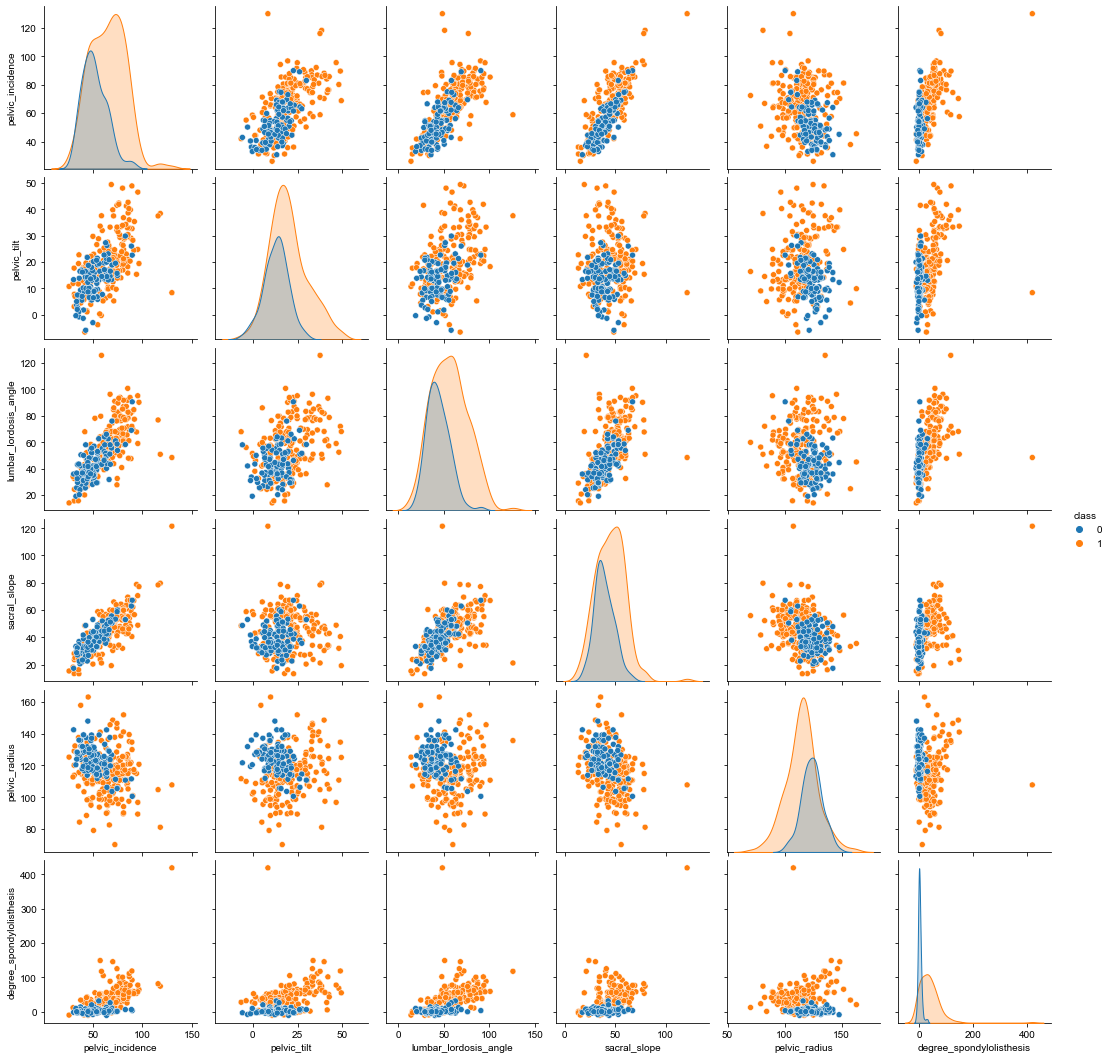

In [4]:
# Using the pairplot function of the seaborn library, plot graphs between all pairs of variables using the colour parameter to distingush between classes 0 and 1

sns.pairplot(df,hue='class')
sns.set(rc = {'figure.figsize':(10,10)})

(b) ii. Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1

<AxesSubplot:xlabel='class', ylabel='degree_spondylolisthesis'>

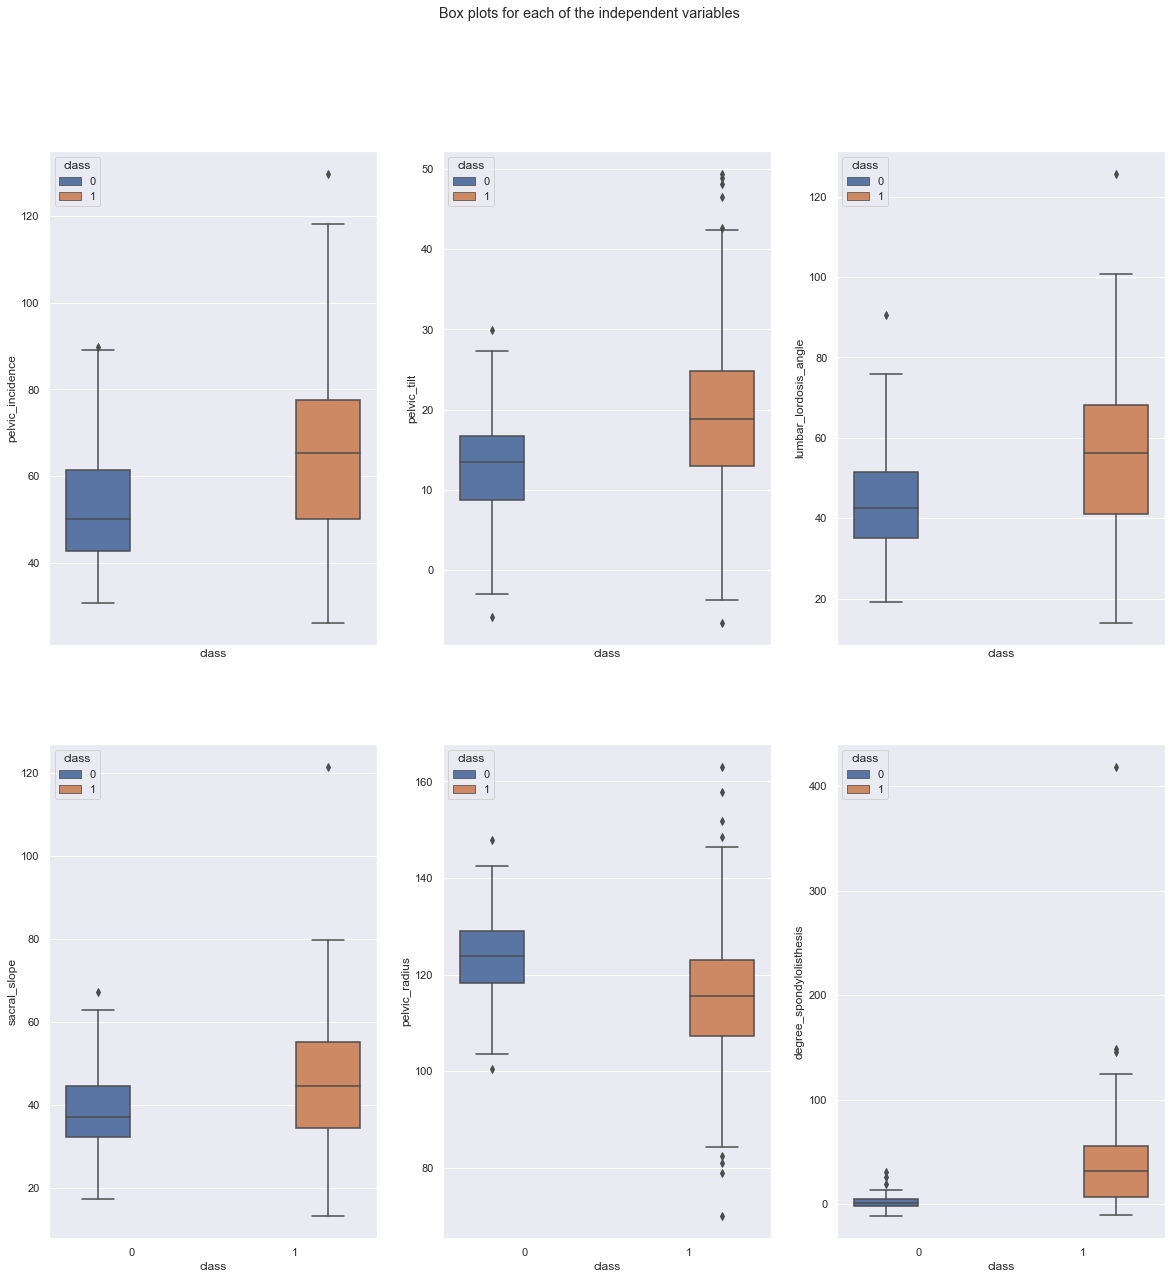

In [5]:
# Using the boxplot function of the seaborn library, plot graphs using the colour parameter to distingush between classes 0 and 1

fig, axes = plt.subplots(2, 3, sharex=True, figsize=(20,20))
fig.suptitle('Box plots for each of the independent variables')

sns.boxplot(y='pelvic_incidence',x='class',data=df,hue='class',ax=axes[0,0])
sns.boxplot(y='pelvic_tilt',x='class',data=df,hue='class',ax=axes[0,1])
sns.boxplot(y='lumbar_lordosis_angle',x='class',data=df,hue='class',ax=axes[0,2])
sns.boxplot(y='sacral_slope',x='class',data=df,hue='class',ax=axes[1,0])
sns.boxplot(y='pelvic_radius',x='class',data=df,hue='class',ax=axes[1,1])
sns.boxplot(y='degree_spondylolisthesis',x='class',data=df,hue='class',ax=axes[1,2])

(b) iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.

In [6]:
# Filter according to the conditions provided and then concatenate both the dataframes to get the required training set

df_train_1 = df[df['class']==0].iloc[0:70]
df_train_2 = df[df['class']==1].iloc[0:140]
df_train = pd.concat([df_train_1,df_train_2],axis=0)
df_train

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [7]:
# The test set will be the remainder of the original dataframe

df_test = df[~df.isin(df_train)]
df_test.dropna(inplace=True)
df_test

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
140,69.563486,15.401139,74.438497,54.162347,105.067356,29.701211,1.0
141,89.504947,48.903653,72.003423,40.601295,134.634291,118.353370,1.0
142,85.290173,18.278890,100.744220,67.011283,110.660701,58.884948,1.0
143,60.626217,20.595958,64.535262,40.030259,117.225554,104.859247,1.0
144,60.044177,14.309656,58.038865,45.734521,105.131664,30.409133,1.0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.0


In [8]:
# Split the training and test set into x_train,y_train,x_test and y_test depending on the independent and output(dependent) variables

x_train = df_train[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']]
y_train = df_train[['class']]
x_test = df_test[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']]
y_test = df_test[['class']]

# (c) Classification using KNN on Vertebral Column Data Set 

(c) i. Write code for k-nearest neighbors with Euclidean metric (or use a software
package).

<ipython-input-9-7277b60f423c>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-9-7277b60f423c>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-9-7277b60f423c>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-9-7277b60f423c>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-9-7277b60f423c>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Text(0.5, 1.0, 'Test Accuracies for different values of k')

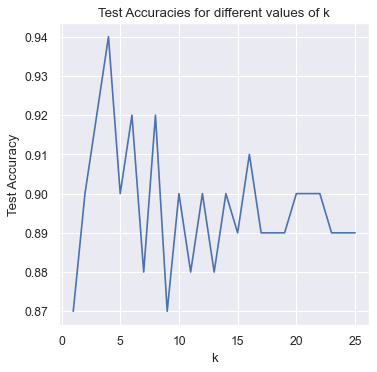

In [9]:
# Use sklearn to implement the KNN algorithm 
# Defualt distance metric for KNN in sklearn is the Euclidean metric
# Run it for all values of k from 1 to 25 
# Plot a graph of the test accuracies obtained for different values of k VS k 

k_values = range(1,26)

accuracy = {}
accuracy_list = []

for k in k_values:
        k_nn = KNeighborsClassifier(n_neighbors=k)
        k_nn.fit(x_train,y_train)
        y_pred = k_nn.predict(x_test)
        accuracy[k] = metrics.accuracy_score(y_test,y_pred)
        accuracy_list.append(metrics.accuracy_score(y_test,y_pred))
        
figure(figsize=(5, 5), dpi=80)      
plt.plot(k_values,accuracy_list)
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies for different values of k') 

(c) ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for
k belonging to {208; 205; : : : ; 7; 4; 1} (in reverse order). You are welcome to use smaller
increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision,
and F1-score when k = k*.

<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Optimal k: 4


<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-10-f5ee55b77273>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

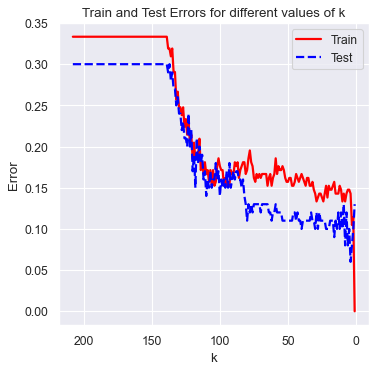

In [10]:
# For different values of k ranging from 208 to 1, implement the KNN algorithm (decrements of 1 considered i.e. 208,207,...1)
# Choose the optimal k as the k which gives the minimum test error
# Plot a graph of the train and test accuracies obtained for different values of k VS k (k in reverse order)

k_nn = KNeighborsClassifier()

train_errors = []
test_errors = []

k_values = []
for i in range(208,0,-1):
    k_values.append(i)

for k in k_values: 
    k_nn.n_neighbors = k 
    k_nn.fit(x_train,y_train)
    train_error = 1-k_nn.score(x_train,y_train)
    test_error = 1-k_nn.score(x_test,y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

i_optim = np.argmin(test_errors)
k_optim = k_values[i_optim]

print("Optimal k:",k_optim)

figure(figsize=(5, 5), dpi=80)
plt.plot(k_values,train_errors, color='red', label='Train Error', linewidth=2)
plt.plot(k_values,test_errors, color='blue', label='Test Error', linewidth=2, linestyle='dashed')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Train and Test Errors for different values of k') 
plt.legend(['Train','Test'])
plt.gca().invert_xaxis()

In [11]:
# Calculate the train error, the test accuracy and the test error for the optimal k obtained above

k_nn = KNeighborsClassifier(n_neighbors=4)
k_nn.fit(x_train,y_train)
y_pred = k_nn.predict(x_test)
train_error = 1-k_nn.score(x_train,y_train)
test_accuracy = metrics.accuracy_score(y_test,y_pred)
print("Optimal k:",4)
print('\n')
print("Train Error:",train_error)
print('\n')
print("Test Accuracy:",test_accuracy)
print("Test Error:",1-test_accuracy)

Optimal k: 4


Train Error: 0.1428571428571429


Test Accuracy: 0.94
Test Error: 0.06000000000000005


<ipython-input-11-0160163afa4d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)


In [12]:
# Calculate the confusion matrix, true positive rate(TPR)/recall/sensitivity, true negative rate(TNR)/specificity, precision and F1-score for the optimal k obtained above
# Recall is the same as TPR

cf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cf)

print('\n')
print('Classification Report: \n {}'.format(classification_report(y_test, y_pred)))

print('CLASS 0')
# print('\n')
# print("TPR/Recall:",25/(25+5))
print("TNR:",69/(69+1))
# print("Precision:",25/(25+1))
# print("F1 Score:",(2*(25/(25+1))*(25/(25+5)))/((25/(25+1))+(25/(25+5))))

print('\n')
print('CLASS 1')
# print('\n')
# print("TPR/Recall:",69/(69+1))
print("TNR:",25/(25+5))
# print("Precision:",69/(69+5))
# print("F1 Score:",(2*(69/(69+5))*(69/(69+1)))/((69/(69+5))+(69/(69+1))))

Confusion Matrix: 
 [[25  5]
 [ 1 69]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.83      0.89        30
         1.0       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

CLASS 0
TNR: 0.9857142857142858


CLASS 1
TNR: 0.8333333333333334


(c) iii. Since the computation time depends on the size of the training set, one may
only use a subset of the training set. Plot the best test error rate, which
is obtained by some value of k, against the size of training set, when the
size of training set is N belonging to {10; 20; 30; : : : ; 210}.Note: for each N, select
your training set by choosing the first [N/3] rows of Class 0 and the first
N-[N/3] rows of Class 1 in the training set you created in 1(b)iii. Also, for
each N, select the optimal k from a set starting from k = 1, increasing by 5.
For example, if N = 200, the optimal k is selected from {1; 6; 11; : : : ; 196}.
This plot is called a Learning Curve.

N: 10
Optimal k: 1


Train error for k_opt: 0.0
Test error for k_opt: 0.25




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 20
Optimal k: 6


Train error for k_opt: 0.15000000000000002
Test error for k_opt: 0.19999999999999996


N: 30
Optimal k: 1


Train error for k_opt: 0.0
Test error for k_opt: 0.21999999999999997




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 40
Optimal k: 11


Train error for k_opt: 0.19999999999999996
Test error for k_opt: 0.25




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 50
Optimal k: 26


Train error for k_opt: 0.31999999999999995
Test error for k_opt: 0.30000000000000004




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 60
Optimal k: 21


Train error for k_opt: 0.2666666666666667
Test error for k_opt: 0.29000000000000004




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 70
Optimal k: 26


Train error for k_opt: 0.27142857142857146
Test error for k_opt: 0.29000000000000004




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 80
Optimal k: 31


Train error for k_opt: 0.30000000000000004
Test error for k_opt: 0.29000000000000004




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 90
Optimal k: 41


Train error for k_opt: 0.30000000000000004
Test error for k_opt: 0.29000000000000004




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 100
Optimal k: 6


Train error for k_opt: 0.18000000000000005
Test error for k_opt: 0.26




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 110
Optimal k: 6


Train error for k_opt: 0.19090909090909092
Test error for k_opt: 0.21999999999999997




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 120
Optimal k: 16


Train error for k_opt: 0.19166666666666665
Test error for k_opt: 0.17000000000000004




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 130
Optimal k: 16


Train error for k_opt: 0.18461538461538463
Test error for k_opt: 0.16000000000000003




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 140
Optimal k: 16


Train error for k_opt: 0.18571428571428572
Test error for k_opt: 0.15000000000000002




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 150
Optimal k: 16


Train error for k_opt: 0.18000000000000005
Test error for k_opt: 0.13




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 160
Optimal k: 6


Train error for k_opt: 0.17500000000000004
Test error for k_opt: 0.13




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 170
Optimal k: 6


Train error for k_opt: 0.16470588235294115
Test error for k_opt: 0.13




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 180
Optimal k: 6


Train error for k_opt: 0.15555555555555556
Test error for k_opt: 0.09999999999999998




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 190
Optimal k: 6


Train error for k_opt: 0.1473684210526316
Test error for k_opt: 0.08999999999999997




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 200
Optimal k: 6


Train error for k_opt: 0.15500000000000003
Test error for k_opt: 0.08999999999999997




<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train_sub,y_train_sub)
<ipython-input-13-5342b8eb3f87>:36: DataConversionWarning: A column-vector y was passed 

N: 210
Optimal k: 6


Train error for k_opt: 0.14761904761904765
Test error for k_opt: 0.07999999999999996




Text(0.5, 1.0, 'Learning Curve')

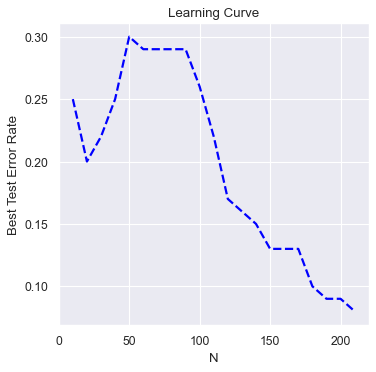

In [13]:
# Filter according to the conditions provided and then concatenate both the dataframes to get the required training set
# The test set will be same as that we used in 1(b)iii
# Split the training and test set into x_train,y_train,x_test and y_test depending on the independent and output(dependent) variables
# For every value of N belonging to {10; 20; 30; : : : ; 210}, implement the KNN algorithm for all k values belonging to {6; 11; : : : ; 196} (stopping before k exceeds N) and select the optimal k as the one that gives the minimum test error rate for that value of N
# Plot the learning curve(Best test error rate given by the optimal k for that N VS N(size of the training set))

N_values = []
test_errors_final = []

for i in range (10,211,10):
    N_values.append(i)
    
    df_train_sub_1 = df[df['class']==0].iloc[0:(int(i/3))]
    df_train_sub_2 = df[df['class']==1].iloc[0:((i-int((i/3))))]
    df_train_sub = pd.concat([df_train_sub_1,df_train_sub_2],axis=0)
    
    df_test_sub  =df[~df.isin(df_train_sub)]
    df_test_sub.dropna(inplace=True)
    
    x_train_sub = df_train_sub[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']]
    y_train_sub = df_train_sub[['class']]
    x_test_sub = df_test[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']]
    y_test_sub = df_test[['class']]
  
    k_nn = KNeighborsClassifier()

    train_errors = []
    test_errors = []

    k_values = []
    for j in range(1,i+1,5):
        k_values.append(j)      

    for k in k_values: 
        k_nn.n_neighbors = k 
        k_nn.fit(x_train_sub,y_train_sub)
        train_error = 1-k_nn.score(x_train_sub,y_train_sub)
        test_error = 1-k_nn.score(x_test_sub,y_test_sub)
        train_errors.append(train_error)
        test_errors.append(test_error)

    i_optim = np.argmin(test_errors)
    k_optim = k_values[i_optim]

    print("N:",i)
    print("Optimal k:",k_optim)
    print('\n')
    print("Train error for k_opt:",train_errors[i_optim])
    print("Test error for k_opt:",np.min(test_errors))
    print('\n')
    
    test_errors_final.append(np.min(test_errors))

figure(figsize=(5, 5), dpi=80)
plt.plot(N_values,test_errors_final, color='blue', label='Best Test Error Rate', linewidth=2, linestyle='dashed')
plt.xlabel('N')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve') 

# (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k*) in a table. Use all of your training data and select the best k when { 1; 6; 11; : : : ; 196}.

(d) i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1.

In [14]:
# Change the distance metric in the KNN algorithm to Minkowski distance with p=1 which gives us the Manhattan distance
# Find out the test errors for all values of k from {1,6,11,....196}

k_nn = KNeighborsClassifier(p = 1, metric='minkowski')

train_errors = []
test_errors = []

k_values = []
for i in range(1,200,5):
    k_values.append(i)

for k in k_values: 
    k_nn.n_neighbors = k 
    k_nn.fit(x_train,y_train)
    train_error = 1-k_nn.score(x_train,y_train)
    test_error = 1-k_nn.score(x_test,y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

print("Test errors:",test_errors)

<ipython-input-14-c0d726132cf4>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-14-c0d726132cf4>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-14-c0d726132cf4>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-14-c0d726132cf4>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-14-c0d726132cf4>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Test errors: [0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.10999999999999999, 0.12, 0.13, 0.13, 0.13, 0.14, 0.13, 0.15000000000000002, 0.15000000000000002, 0.14, 0.14, 0.16000000000000003, 0.15000000000000002, 0.19999999999999996, 0.19999999999999996, 0.21999999999999997, 0.20999999999999996, 0.22999999999999998, 0.20999999999999996, 0.21999999999999997, 0.24, 0.28, 0.28, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]


<ipython-input-14-c0d726132cf4>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-14-c0d726132cf4>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-14-c0d726132cf4>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-14-c0d726132cf4>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-14-c0d726132cf4>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

In [15]:
# Since we get the same test errors(minimum) for k=1,6,11 and 26, we further calculate all of the other performance measures of the algorithm by formulating the confusion matrix to get a better idea on what k to choose as the optimal k 

print("MANHATTAN DISTANCE")
print('\n')

for i in (1,6,11,26):
    print('\n')
    print("k:",i)
    k_nn = KNeighborsClassifier(n_neighbors=i, p = 1, metric='minkowski')
    k_nn.fit(x_train,y_train)
    y_pred = k_nn.predict(x_test)

    cf = confusion_matrix(y_test, y_pred)
    print('\n')
    print("Confusion Matrix: \n",cf)

    print('\n')
    print('Classification Report: \n {}'.format(classification_report(y_test, y_pred)))

MANHATTAN DISTANCE




k: 1


Confusion Matrix: 
 [[21  9]
 [ 2 68]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.91      0.70      0.79        30
         1.0       0.88      0.97      0.93        70

    accuracy                           0.89       100
   macro avg       0.90      0.84      0.86       100
weighted avg       0.89      0.89      0.89       100



k: 6


Confusion Matrix: 
 [[22  8]
 [ 3 67]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.73      0.80        30
         1.0       0.89      0.96      0.92        70

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.86       100
weighted avg       0.89      0.89      0.89       100



k: 11


Confusion Matrix: 
 [[20 10]
 [ 1 69]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.67      0.78 

<ipython-input-15-7d033a9e2a34>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-15-7d033a9e2a34>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-15-7d033a9e2a34>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-15-7d033a9e2a34>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)


In [16]:
# Depending on the F1 scores of class 1(i.e. Abnormal(since we would want to focus on abnormality more)), we choose the optimal value of k as 11 (cannot choose k=1 since that will give us an overfitting model and between k=11 and 26, k=11 will result in lesser computation time)
# Since this is an unbalanced training set, accuracy will not be a good indicator of the performance of the algorithm and hence can't be chosen; in this case f1 being the harmonic mean of precision and recall proves to be a good indicator)
# Calculate all of the performance measures again

print("MANHATTAN DISTANCE")
print('\n')

k_nn = KNeighborsClassifier(n_neighbors=11, p = 1, metric='minkowski')
k_nn.fit(x_train,y_train)
y_pred = k_nn.predict(x_test)
train_error = 1-k_nn.score(x_train,y_train)
test_error = 1-k_nn.score(x_test,y_test)

print("Optimal k:",11)
print('\n')
print("Train error for k_opt:",train_error)
print("Test error for k_opt:",test_error)

cf = confusion_matrix(y_test, y_pred)
print('\n')
print("Confusion Matrix: \n",cf)

print('\n')
print('Classification Report: \n {}'.format(classification_report(y_test, y_pred)))

<ipython-input-16-e50e456d27ce>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)


MANHATTAN DISTANCE


Optimal k: 11


Train error for k_opt: 0.1428571428571429
Test error for k_opt: 0.10999999999999999


Confusion Matrix: 
 [[20 10]
 [ 1 69]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.67      0.78        30
         1.0       0.87      0.99      0.93        70

    accuracy                           0.89       100
   macro avg       0.91      0.83      0.86       100
weighted avg       0.90      0.89      0.88       100



B. with log10(p) belonging to {0.1; 0.2; 0.3; : : : ; 1}. In this case, use the k* you found
for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [17]:
# Using the optimal value of k obtained from above, we calculate the best value of log10(p) belonging to {0.1; 0.2; 0.3; : : : ; 1}
# Find out the test errors for all values of p provided

k_optim = 11
p_values = [10**0.1,10**0.2,10**0.3,10**0.4,10**0.5,10**0.6,10**0.7,10**0.8,10**0.9,10**1]

train_errors = []
test_errors = []
    
for i in p_values:
    k_nn = KNeighborsClassifier(n_neighbors=k_optim, p = i, metric='minkowski')
    
    k_nn.fit(x_train,y_train)
    train_error = 1-k_nn.score(x_train,y_train)
    test_error = 1-k_nn.score(x_test,y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
print("Test errors:",test_errors)

<ipython-input-17-edb9136ecabe>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-17-edb9136ecabe>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-17-edb9136ecabe>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-17-edb9136ecabe>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-17-edb9136ecabe>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Test errors: [0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.12, 0.12, 0.12, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999]


<ipython-input-17-edb9136ecabe>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-17-edb9136ecabe>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)


In [18]:
# Since we get the same test errors(minimum) for p=0.1,0.2,0.8,0.9 and 1, we further calculate all of the other performance measures of the algorithm by formulating the confusion matrix to get a better idea on what p to choose as the optimal p 

p_values_sel = [10**0.1,10**0.2,10**0.8,10**0.9,10**1]

for p_optim in p_values_sel:
    knn = KNeighborsClassifier(n_neighbors=k_optim, p = p_optim, metric='minkowski')
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    train_error_p_optim = 1-k_nn.score(x_train,y_train)
    test_error_p_optim = 1-metrics.accuracy_score(y_test,y_pred)

    print('\n')
    print("k:",k_optim)
    print('\n')
    print("Optimal p:",math.log(p_optim,10))
    print('\n')
    print("Train error for p_optim:",train_error_p_optim)
    print("Test error for p_optim:",test_error_p_optim)

    cf = confusion_matrix(y_test, y_pred)
    print('\n')
    print("Confusion Matrix: \n",cf)

    print('\n')
    print('Classification Report: \n {}'.format(classification_report(y_test, y_pred)))

print('\n')
print("Best log to the base 10 p: 0.1/0.2/0.8/0.9/1")

<ipython-input-18-86cb3186de43>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)
<ipython-input-18-86cb3186de43>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)




k: 11


Optimal p: 0.1


Train error for p_optim: 0.16190476190476188
Test error for p_optim: 0.10999999999999999


Confusion Matrix: 
 [[20 10]
 [ 1 69]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.67      0.78        30
         1.0       0.87      0.99      0.93        70

    accuracy                           0.89       100
   macro avg       0.91      0.83      0.86       100
weighted avg       0.90      0.89      0.88       100



k: 11


Optimal p: 0.2


Train error for p_optim: 0.16190476190476188
Test error for p_optim: 0.10999999999999999


Confusion Matrix: 
 [[19 11]
 [ 0 70]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.63      0.78        30
         1.0       0.86      1.00      0.93        70

    accuracy                           0.89       100
   macro avg       0.93      0.82      0.85       100
weighted avg       0.90      0.89

<ipython-input-18-86cb3186de43>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)
<ipython-input-18-86cb3186de43>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)
<ipython-input-18-86cb3186de43>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)


C. which becomes Chebyshev Distance with p tending to infinity

In [19]:
# Change the distance metric in the KNN algorithm to Minkowski distance with p=infinity which gives us the Chebyshev distance
# Find out the optimal value of k and calculate all of the performance measures for that k

k_nn = KNeighborsClassifier(p = float('inf'), metric='minkowski')

train_errors = []
test_errors = []

k_values = []
for i in range(1,200,5):
    k_values.append(i)

for k in k_values: 
    k_nn.n_neighbors = k 
    k_nn.fit(x_train,y_train)
    train_error = 1-k_nn.score(x_train,y_train)
    test_error = 1-k_nn.score(x_test,y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

print("Test errors:",test_errors)

i_optim = np.argmin(test_errors)
k_optim = k_values[i_optim]

print('\n')
print("CHEBYSHEV DISTANCE")

print('\n')
print("Optimal k:",k_optim)
print('\n')
print("Train error for k_opt:",train_errors[i_optim])
print("Test error for k_opt:",np.min(test_errors))

cf = confusion_matrix(y_test, y_pred)
print('\n')
print("Confusion Matrix: \n",cf)

print('\n')
print('Classification Report: \n {}'.format(classification_report(y_test, y_pred)))

<ipython-input-19-48b683f460d3>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-19-48b683f460d3>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-19-48b683f460d3>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-19-48b683f460d3>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-19-48b683f460d3>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Test errors: [0.13, 0.09999999999999998, 0.12, 0.07999999999999996, 0.10999999999999999, 0.12, 0.12, 0.09999999999999998, 0.13, 0.12, 0.12, 0.12, 0.14, 0.13, 0.14, 0.10999999999999999, 0.14, 0.12, 0.15000000000000002, 0.14, 0.18999999999999995, 0.18000000000000005, 0.18000000000000005, 0.18000000000000005, 0.20999999999999996, 0.20999999999999996, 0.25, 0.28, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]


CHEBYSHEV DISTANCE


Optimal k: 16


Train error for k_opt: 0.14761904761904765
Test error for k_opt: 0.07999999999999996


Confusion Matrix: 
 [[19 11]
 [ 0 70]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.63      0.78        30
         1.0       0.86      1.00      0.93        70

    accuracy                  

<ipython-input-19-48b683f460d3>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-19-48b683f460d3>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-19-48b683f460d3>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-19-48b683f460d3>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)


(d) ii. Mahalanobis Distance.

In [20]:
# Change the distance metric in the KNN algorithm to Mahalanobis distance
# Find out the optimal value of k and calculate all of the performance measures for that k

k_nn = KNeighborsClassifier(metric='mahalanobis', metric_params={'V': np.cov(x_train.values.T)})

train_errors = []
test_errors = []

k_values = []
for i in range(1,200,5):
    k_values.append(i)

for k in k_values: 
    k_nn.n_neighbors = k 
    k_nn.fit(x_train,y_train)
    train_error = 1-k_nn.score(x_train,y_train)
    test_error = 1-k_nn.score(x_test,y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

print("Test errors:",test_errors)

i_optim = np.argmin(test_errors)
k_optim = k_values[i_optim]

print('\n')
print("MAHALANOBIS DISTANCE")

print('\n')
print("Optimal k:",k_optim)
print('\n')
print("Train error for k_opt:",train_errors[i_optim])
print("Test error for k_opt:",np.min(test_errors))

cf = confusion_matrix(y_test, y_pred)
print('\n')
print("Confusion Matrix: \n",cf)

print('\n')
print('Classification Report: \n {}'.format(classification_report(y_test, y_pred)))

<ipython-input-20-442c0f8f1cf1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-20-442c0f8f1cf1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-20-442c0f8f1cf1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-20-442c0f8f1cf1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-20-442c0f8f1cf1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
<ipython-input-20-442c0f8f1cf1>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_dist

Test errors: [0.16000000000000003, 0.14, 0.17000000000000004, 0.18000000000000005, 0.19999999999999996, 0.18999999999999995, 0.18999999999999995, 0.18000000000000005, 0.20999999999999996, 0.21999999999999997, 0.20999999999999996, 0.19999999999999996, 0.24, 0.21999999999999997, 0.24, 0.20999999999999996, 0.21999999999999997, 0.21999999999999997, 0.22999999999999998, 0.24, 0.25, 0.24, 0.24, 0.24, 0.27, 0.29000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]


MAHALANOBIS DISTANCE


Optimal k: 6


Train error for k_opt: 0.1333333333333333
Test error for k_opt: 0.14


Confusion Matrix: 
 [[19 11]
 [ 0 70]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.63      0.78      

In [21]:
# Summarize all of the results for the optimal values of k in a table

d= {'Distance - Question No': ['Minkowski distance- (d) i. A. -Manhattan distance', '(d) i. B.', 'Minkowski distance- (d) i. C. -Chebyshev distance', 'Mahalanobis distance- (d) ii.'], 'k*': [11, 11, 16, 6], 'Test Errror for k=k*': [0.10999999999999999, 0.10999999999999999, 0.07999999999999996, 0.14]}
df_summary = pd.DataFrame(data=d)
df_summary

,Distance - Question No,k*,Test Errror for k=k*
0,Minkowski distance- (d) i. A. -Manhattan distance,11,0.11
1,(d) i. B.,11,0.11
2,Minkowski distance- (d) i. C. -Chebyshev distance,16,0.08
3,Mahalanobis distance- (d) ii.,6,0.14


# (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k belongs to { 1; 6; 11; 16; : : : ; 196}.

In [22]:
# Instead of the default value of weights='uniform', we change it to 'distance' for a weighted decision instead of the majority polling decision
# We implement the KNN algorithm considering the distance metric as Euclidean 
# Find out the optimal value of k and calculate all of the performance measures for that k

k_nn = KNeighborsClassifier(weights='distance')

train_errors = []
test_errors = []

k_values = []
for i in range(1,200,5):
    k_values.append(i)

for k in k_values: 
    k_nn.n_neighbors = k 
    k_nn.fit(x_train,y_train)
    train_error = 1-k_nn.score(x_train,y_train)
    test_error = 1-k_nn.score(x_test,y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

print("Test errors:",test_errors)

i_optim = np.argmin(test_errors)
k_optim = k_values[i_optim]

print('\n')
print("EUCLIDEAN DISTANCE")

print('\n')
print("Optimal k:",k_optim)
print('\n')
print("Train error for k_opt:",train_errors[i_optim])
print("Test error for k_opt:",np.min(test_errors))

cf = confusion_matrix(y_test, y_pred)
print('\n')
print("Confusion Matrix: \n",cf)

print('\n')
print('Classification Report: \n {}'.format(classification_report(y_test, y_pred)))

<ipython-input-22-1135480a2f76>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-22-1135480a2f76>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-22-1135480a2f76>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-22-1135480a2f76>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-22-1135480a2f76>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Test errors: [0.13, 0.09999999999999998, 0.12, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.13, 0.14, 0.14, 0.12, 0.14, 0.14, 0.13, 0.13, 0.13, 0.14, 0.14, 0.17000000000000004, 0.18999999999999995, 0.18999999999999995, 0.19999999999999996, 0.22999999999999998, 0.25, 0.27, 0.27, 0.27, 0.27, 0.28, 0.28]


EUCLIDEAN DISTANCE


Optimal k: 6


Train error for k_opt: 0.0
Test error for k_opt: 0.09999999999999998


Confusion Matrix: 
 [[19 11]
 [ 0 70]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.63      0.78        30
         1.0       0.86      1.00      0.93        70

    accuracy                           0.89       100
   macro avg       0.93      0.82      0.85       100
weighted avg       0.90      

In [23]:
# We implement the KNN algorithm considering the distance metric as Minkowski with p=1 which gives us the Manhattan distance 
# Find out the optimal value of k and calculate all of the performance measures for that k

k_nn = KNeighborsClassifier(p = 1, metric='minkowski', weights='distance')

train_errors = []
test_errors = []

k_values = []
for i in range(1,200,5):
    k_values.append(i)

for k in k_values: 
    k_nn.n_neighbors=k 
    k_nn.fit(x_train,y_train)
    train_error=1-k_nn.score(x_train,y_train)
    test_error=1-k_nn.score(x_test,y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

print("Test errors:",test_errors)
    
i_optim = np.argmin(test_errors)
k_optim = k_values[i_optim]

print('\n')
print("MANHATTAN DISTANCE")

print('\n')
print("Optimal k:",k_optim)
print('\n')
print("Train error for k_opt:",train_errors[i_optim])
print("Test error for k_opt:",np.min(test_errors))

cf = confusion_matrix(y_test, y_pred)
print('\n')
print("Confusion Matrix: \n",cf)

print('\n')
print('Classification Report: \n {}'.format(classification_report(y_test, y_pred)))

<ipython-input-23-6bc67c101f95>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-23-6bc67c101f95>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-23-6bc67c101f95>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-23-6bc67c101f95>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-23-6bc67c101f95>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Test errors: [0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.12, 0.10999999999999999, 0.09999999999999998, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.13, 0.13, 0.10999999999999999, 0.12, 0.14, 0.14, 0.13, 0.13, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.16000000000000003, 0.17000000000000004, 0.18000000000000005, 0.18999999999999995, 0.20999999999999996, 0.24, 0.25, 0.27, 0.27, 0.27, 0.27, 0.28, 0.29000000000000004]


MANHATTAN DISTANCE


Optimal k: 26


Train error for k_opt: 0.0
Test error for k_opt: 0.09999999999999998


Confusion Matrix: 
 [[19 11]
 [ 0 70]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.63      0.78        30
         1.0       0.86      1.00      0.93        70

    accuracy                           0.89       100
   macr

In [24]:
# We implement the KNN algorithm considering the distance metric as Minkowski with p=infinity which gives us the Chebyshev distance 
# Find out the test errors for all values of k from {1,6,11,....196}

k_nn = KNeighborsClassifier(p = float('inf'), metric='minkowski', weights='distance')

train_errors = []
test_errors = []

k_values = []
for i in range(1,200,5):
    k_values.append(i)

for k in k_values: 
    k_nn.n_neighbors=k 
    k_nn.fit(x_train,y_train)
    train_error=1-k_nn.score(x_train,y_train)
    test_error=1-k_nn.score(x_test,y_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

print("Test errors:",test_errors)

<ipython-input-24-29b5419f0426>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-24-29b5419f0426>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-24-29b5419f0426>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-24-29b5419f0426>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-24-29b5419f0426>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Test errors: [0.13, 0.13, 0.12, 0.10999999999999999, 0.12, 0.12, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.12, 0.10999999999999999, 0.13, 0.12, 0.12, 0.12, 0.14, 0.13, 0.14, 0.14, 0.14, 0.14, 0.14, 0.15000000000000002, 0.14, 0.16000000000000003, 0.16000000000000003, 0.18000000000000005, 0.18999999999999995, 0.20999999999999996, 0.20999999999999996, 0.22999999999999998, 0.26, 0.26, 0.26, 0.27, 0.27, 0.27, 0.28]


<ipython-input-24-29b5419f0426>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-24-29b5419f0426>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-24-29b5419f0426>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-24-29b5419f0426>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-24-29b5419f0426>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

In [25]:
# Since we get the same test errors(minimum) for k=16,31,36,41 and 61, we further calculate all of the other performance measures of the algorithm by formulating the confusion matrix to get a better idea on what k to choose as the optimal k 

print("CHEBYSHEV DISTANCE")
print('\n')

for i in (16,31,36,41,61):
    print('\n')
    print("k:",i)
    k_nn = KNeighborsClassifier(n_neighbors=i, p = float('inf'), metric='minkowski', weights='distance')
    k_nn.fit(x_train,y_train)
    y_pred = k_nn.predict(x_test)

    cf = confusion_matrix(y_test, y_pred)
    print('\n')
    print("Confusion Matrix: \n",cf)

    print('\n')
    print('Classification Report: \n {}'.format(classification_report(y_test, y_pred)))

<ipython-input-25-2ebb456c5ea7>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-25-2ebb456c5ea7>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-25-2ebb456c5ea7>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-25-2ebb456c5ea7>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)


CHEBYSHEV DISTANCE




k: 16


Confusion Matrix: 
 [[19 11]
 [ 0 70]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.63      0.78        30
         1.0       0.86      1.00      0.93        70

    accuracy                           0.89       100
   macro avg       0.93      0.82      0.85       100
weighted avg       0.90      0.89      0.88       100



k: 31


Confusion Matrix: 
 [[20 10]
 [ 1 69]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.67      0.78        30
         1.0       0.87      0.99      0.93        70

    accuracy                           0.89       100
   macro avg       0.91      0.83      0.86       100
weighted avg       0.90      0.89      0.88       100



k: 36


Confusion Matrix: 
 [[20 10]
 [ 1 69]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.67      0.7

<ipython-input-25-2ebb456c5ea7>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)


In [26]:
# Depending on the F1 scores of class 1(i.e. Abnormal(since we would want to focus on abnormality more)), we can choose the optimal value of k as any of 16,31,36,41 and 61 as all of them give us the same F1 score, and calculate all of the performance measures again
# Since this is an unbalanced training set, accuracy will not be a good indicator of the performance of the algorithm and hence can't be chosen; in this case f1 being the harmonic mean of precision and recall proves to be a good indicator)
# Calculate all of the performance measures again
# For lesser computation time, we can choose the optimal value of k as the smallest out of these i.e. 16

print("CHEBYSHEV DISTANCE")
print('\n')

for i in (16,31,36,41,61):
    k_nn = KNeighborsClassifier(n_neighbors=i, p = float('inf'), metric='minkowski', weights='distance')
    k_nn.fit(x_train,y_train)
    y_pred = k_nn.predict(x_test)
    train_error = 1-k_nn.score(x_train,y_train)
    test_error = 1-k_nn.score(x_test,y_test)

    print('\n')
    print("Optimal k:",i)
    print('\n')
    print("Train error for k_opt:",train_error)
    print("Test error for k_opt:",test_error)

    cf = confusion_matrix(y_test, y_pred)
    print('\n')
    print("Confusion Matrix: \n",cf)

    print('\n')
    print('Classification Report: \n {}'.format(classification_report(y_test, y_pred)))

<ipython-input-26-a3a8840e7e58>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-26-a3a8840e7e58>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-26-a3a8840e7e58>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)
<ipython-input-26-a3a8840e7e58>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)


CHEBYSHEV DISTANCE




Optimal k: 16


Train error for k_opt: 0.0
Test error for k_opt: 0.10999999999999999


Confusion Matrix: 
 [[19 11]
 [ 0 70]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.63      0.78        30
         1.0       0.86      1.00      0.93        70

    accuracy                           0.89       100
   macro avg       0.93      0.82      0.85       100
weighted avg       0.90      0.89      0.88       100



Optimal k: 31


Train error for k_opt: 0.0
Test error for k_opt: 0.10999999999999999


Confusion Matrix: 
 [[20 10]
 [ 1 69]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.67      0.78        30
         1.0       0.87      0.99      0.93        70

    accuracy                           0.89       100
   macro avg       0.91      0.83      0.86       100
weighted avg       0.90      0.89      0.88       100



Optimal k: 36

<ipython-input-26-a3a8840e7e58>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  k_nn.fit(x_train,y_train)


In [27]:
# Summarize all of the results for the optimal values of k in a table

d= {'Distance - Question No': ['Euclidean distance', 'Manhattan distance', 'Chebyshev distance'], 'k*': [6, 26, '16 / 31 / 36 / 41 / 61'], 'Test Errror for k=k*': [0.09999999999999998, 0.09999999999999998, 0.10999999999999999]}
df_summary = pd.DataFrame(data=d)
df_summary

,Distance - Question No,k*,Test Errror for k=k*
0,Euclidean distance,6,0.10
1,Manhattan distance,26,0.10
2,Chebyshev distance,16 / 31 / 36 / 41 / 61,0.11


# (f) What is the lowest training error rate you achieved in this homework?

In [28]:
# Out of all the training error rates obtained in this homework, print the lowest

print("LOWEST training error rate in this homework:",0.00)
print("This is because when k=1, the nearest neighbor of each point will be the point itself. Hence this will result in an error rate of 0.")

LOWEST training error rate in this homework: 0.0
This is because when k=1, the nearest neighbor of each point will be the point itself. Hence this will result in an error rate of 0.
